haarcascade face detection


*   이미지 크기, 해상도에 영향을 받는다
*   사전에 만들어진 로직대로 인식하는 방식



In [ ]:
# 내 구글 드라이버에 연동
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Colab에서 GitHub 에 있는 데이터 가져오기
# haarcascade xml 다운로드 URL : https://github.com/opencv/opencv
# Clone Web URL 를 복사해 옵니다.

!git clone https://github.com/opencv/opencv.git

Cloning into 'opencv'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 274644 (delta 3), reused 5 (delta 1), pack-reused 274627
Receiving objects: 100% (274644/274644), 469.20 MiB | 29.53 MiB/s, done.
Resolving deltas: 100% (191912/191912), done.
Checking out files: 100% (6200/6200), done.


In [ ]:
# haarcascade xml 파일만 복사
!cp -r opencv/data/haarcascades gdrive/My\ Drive/CV/Face\ Detection/data/
print('folder copy complete!!')

folder copy complete!!


In [ ]:
# 다운로드 받았던 파일 제거(선택사항)
!rm -r opencv

In [ ]:
# 필요한 패키지와 모듈을 불러옴
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
# OpenCV 버전 확인
print("OpenCV version:")
print(cv2.__version__)

OpenCV version:
4.1.2


In [ ]:
def detectAndDisplay(frame):
    # frame_width 에 맞춰 image resize
    (height, width) = frame.shape[:2]
    ratio = frame_width / width
    dimension = (frame_width, int(height * ratio))
    frame = cv2.resize(frame, dimension, interpolation = cv2.INTER_AREA)

    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # 채널이 많으면 인식율이 떨어짐으로 하나의 채널로 변환(BGR to GRAY)
    frame_gray = cv2.equalizeHist(frame_gray)             # 디지털 이미지처럼 단순화함
    # faces detection 한다.
    faces = face_cascade.detectMultiScale(frame_gray)
    for (x,y,w,h) in faces:
        center = (x + w//2, y + h//2)
        frame = cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 4)  # detection 된 얼굴에 사각형을 그린다.
        faceROI = frame_gray[y:y+h,x:x+w]  # frame_gray에서 방금 그린 얼굴 사각형 영역만 가져온다.(faceROI)
        # faceROI 에서 eyes 을 detection 한다.
        eyes = eyes_cascade.detectMultiScale(faceROI)
        for (x2,y2,w2,h2) in eyes:
            eye_center = (x + x2 + w2//2, y + y2 + h2//2)
            radius = int(round((w2 + h2)*0.25))  # 반지름 계산
            frame = cv2.circle(frame, eye_center, radius, (255, 0, 0 ), 4)  # detection 된 눈에 원을 그린다.
               
    print("#### Face detection(haarcascade) ####")    
    # 이미지를 Display 한다.
    cv2_imshow(frame)

width: 500 pixels
height: 333 pixels
channels: 3
#### Original Image ####


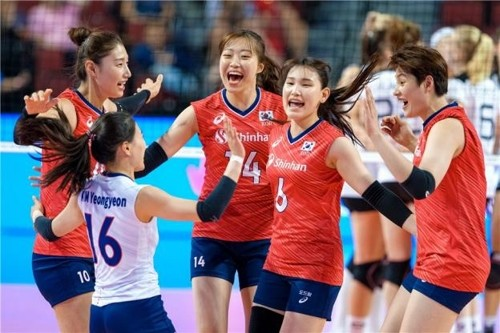

In [ ]:
# detection 하기 전에 원본 이미지를 Display 한다.
img = cv2.imread("gdrive/My Drive/CV/Face Detection/data/image/sports_02.jpg")
print("width: {} pixels".format(img.shape[1]))
print("height: {} pixels".format(img.shape[0]))
print("channels: {}".format(img.shape[2]))

(height, width) = img.shape[:2]

print("#### Original Image ####")
cv2_imshow(img)

In [ ]:
# 특성값이 미리 정의되어 있는 haarcascade xml 파일 위치 정의
face_cascade_name = 'gdrive/My Drive/CV/Face Detection/data/haarcascades/haarcascade_frontalface_alt.xml'     # 얼굴을 인식하는 feature 파일
eyes_cascade_name = 'gdrive/My Drive/CV/Face Detection/data/haarcascades/haarcascade_eye_tree_eyeglasses.xml' # 눈을 인식하는 feature 파일

# face_cascade 인스턴스를 생성한다.
face_cascade = cv2.CascadeClassifier()
# eyes_cascade 인스턴스를 생성한다.
eyes_cascade = cv2.CascadeClassifier()

#### Face detection(haarcascade) ####


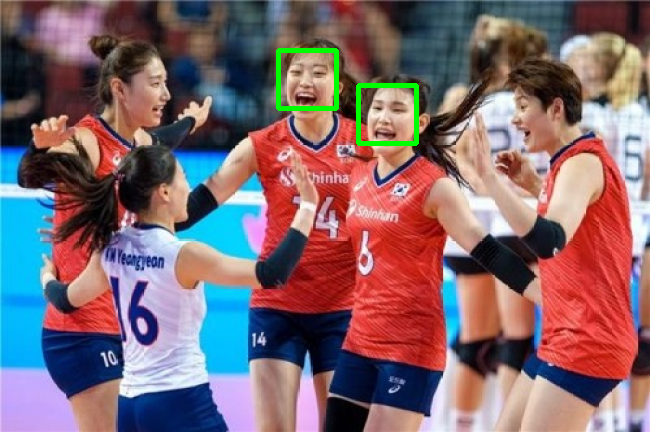

In [ ]:
# cascades 파일을 불러온다.
if not face_cascade.load(cv2.samples.findFile(face_cascade_name)):
    print('--(!)Error loading face cascade')
    exit(0)
if not eyes_cascade.load(cv2.samples.findFile(eyes_cascade_name)):
    print('--(!)Error loading eyes cascade')
    exit(0)

# 이미지 width size 지정
frame_width = 650

# face detection 하고 display 하는 함수 호출
detectAndDisplay(img)